<a href="https://colab.research.google.com/github/MiguelAngel-ht/Image_Processing_/blob/main/Work_13__Segmentatio_of_Images/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic Libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters as ski 

In [2]:
# Function to scale a image from min to max

def ImScale(img, minf=0, maxf=255):

    x_min = img.min()
    x_max = img.max()

    img_scale = minf + ((img - x_min) / (x_max - x_min)) * (maxf - minf)
    img_scale = img_scale.astype('uint8')

    return img_scale

In [3]:
def plot_images(imgs, titles):
  """
      Funtion to plot a serie of images with their respective titles
  """
  fig, axs = plt.subplots(1, len(imgs), figsize=(12, 8), constrained_layout=True)
  k = 0

  for ax, img in zip(axs.flat, imgs):
    ax.set_title(titles[k])
    ax.imshow(img, 'gray', vmax=len(np.unique(img)))
    k += 1

  plt.show()

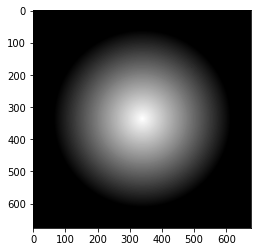

In [4]:
# Read and Show firts images
img = cv.imread('Fig1102(a).tif', 0)
plt.imshow(img, 'gray')
plt.show()

In [7]:
# Save first image as PNG
cv.imwrite('point_original.png', img)

True

In [17]:
# Define kernel for points detection 
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# Define umbralization values
u1 = 2
u2 = 6
u3 = 10
u4 = 20

In [9]:
# Image filtered with the kernel
img_filt = cv.filter2D(img, -1, kernel)

In [18]:
# Obtain differents umbralization and Scale in range of 0-255 

img_pts1 = abs(img_filt) > u1
img_pts1 = ImScale(img_pts1 * img_filt)

img_pts2 = abs(img_filt) > u2
img_pts2 = ImScale(img_pts2 * img_filt)

img_pts3 = abs(img_filt) > u3
img_pts3 = ImScale(img_pts3 * img_filt)

img_pts4 = abs(img_filt) > u4
img_pts4 = ImScale(img_pts4 * img_filt)

In [19]:
# Saving original and filtered images in an array and definition of titles of every image
images = [img, img_pts1, img_pts2, img_pts3, img_pts4]
titles = ['Original', 'Mayor a '+str(u1), 'Mayor a '+str(u2),
          'Mayor a '+str(u3), 'Mayor a '+str(u4)]

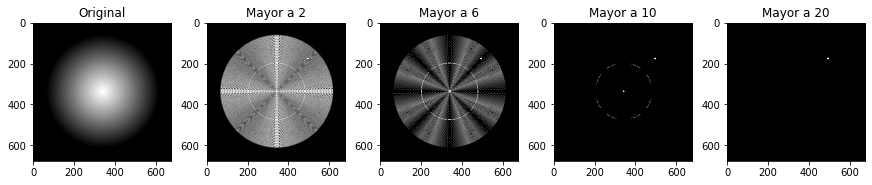

In [20]:
# Plotting all images
plot_images(images, titles)

In [21]:
# Saving all filtered images as PNG

cv.imwrite('point_2.png', img_pts1)
cv.imwrite('point_6.png', img_pts2)
cv.imwrite('point_10.png', img_pts3)
cv.imwrite('point_20.png', img_pts4)

True

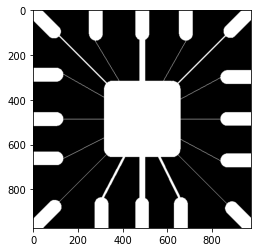

In [22]:
# Reading, Saving and Showing second image
img2 = cv.imread('Fig1104(a).tif', 0)
cv.imwrite('chip_original.png', img2)
plt.imshow(img2, 'gray')
plt.show()

In [23]:
# Definition of kernel to detect horizontal lines
kernel_hor = np.array([[-1, -1, -1],
                       [2, 2, 2],
                       [-1, -1, -1]])

# Definition of kernel to detect horizontal vertical
kernel_ver = np.array([[-1, 2, -1],
                       [-1, 2, -1],
                       [-1, 2, -1]])

# Definition of kernel to detect lines with an angle of 45°
kernel_45 = np.array([[-1, -1, 2],
                      [-1, 2, -1],
                      [2, -1, -1]])

# Definition of kernel to detect lines with an angle of .45°
kernel_135 = np.array([[2, -1, -1],
                       [-1, 2, -1],
                       [-1, -1, 2]])

# Saving all kernels in a list
kernel_lines = [kernel_hor, kernel_ver, kernel_45, kernel_135]

In [24]:
# Funtion that calculate convolution quickly
def np_fftconvolve(A, B):
    return np.real(np.fft.ifft2(np.fft.fft2(A)*np.fft.fft2(B, s=A.shape)))

In [26]:
# Initialization of the list where will saved filtered images
imgs_lines = [img2]

# Computing convolutions, scaling and umbralization of 220 intensity value
for kernel in kernel_lines:

  im = np_fftconvolve(img2, kernel)
  im = ImScale(im)

  mask = abs(im) > 220
  op = im * mask
  im2 = ImScale(op)

  imgs_lines.append(im2)

In [27]:
# Definition of every title 
titles2 = ['Original','Horizontal','Vertical','45 Grados','-45 Grados']

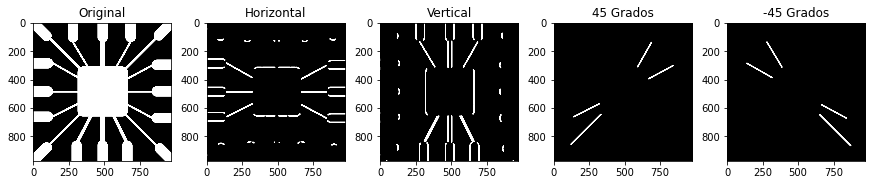

In [28]:
# Plotting results
plot_images(imgs_lines, titles2)

In [29]:
# Saving all filtered images with lines
cv.imwrite('chip_hor.png', imgs_lines[1])
cv.imwrite('chip_ver.png', imgs_lines[2])
cv.imwrite('chip_45.png', imgs_lines[3])
cv.imwrite('chip_-45.png', imgs_lines[4])

True

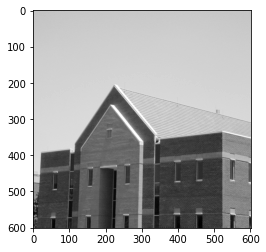

In [30]:
# Reading, saving and showing third image
img3 = cv.imread('Fig1106(a).tif', 0)
cv.imwrite('casa.png', img3)
plt.imshow(img3, 'gray')
plt.show()

In [55]:
# Filtering Edge Detection
img3_pre = ski.prewitt(img3) 
img3_sob = ski.sobel(img3)
img3_rob = ski.roberts(img3)
img3_log = cv.Laplacian(img3, cv.CV_16S)

# Operations to compute Zero Crossing
LoG = img3_log
minLoG = cv.morphologyEx(LoG, cv.MORPH_ERODE, np.ones((3,3)))
maxLoG = cv.morphologyEx(LoG, cv.MORPH_DILATE, np.ones((3,3)))

img3_zer = np.logical_or(np.logical_and(minLoG < 0,  LoG > 0), np.logical_and(maxLoG > 0, LoG < 0))

In [56]:
 # Convert to an unsigned byte
img3_zer = img3_zer.astype(np.uint8) 
img3_zer*=255

In [57]:
# Saving all filtered images in a list and definition of their titles
images3 = [img3, img3_pre, img3_sob, img3_rob, img3_log, img3_zer]
names3 = ['Original', 'Prewitt', 'Sobel', 'Roberts', 'Laplacian', 'Zero Crossing']

In [63]:
# Scaling firts 3 images
for i in range(len(images3)-2):
  images3[i] = ImScale(images3[i])

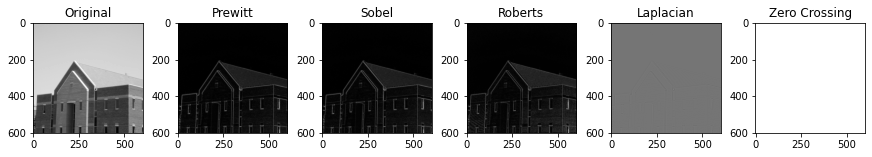

In [59]:
# Plotting results
plot_images(images3, names3)

In [65]:
# Saving all filtered images as PNG
cv.imwrite('casa_prewitt.png', images3[1])
cv.imwrite('casa_sobel.png', images3[2])
cv.imwrite('casa_roberts.png', images3[3])
cv.imwrite('casa_laplacian.png', images3[4])
cv.imwrite('casa_zero.png', images3[5])

True